# Clustering

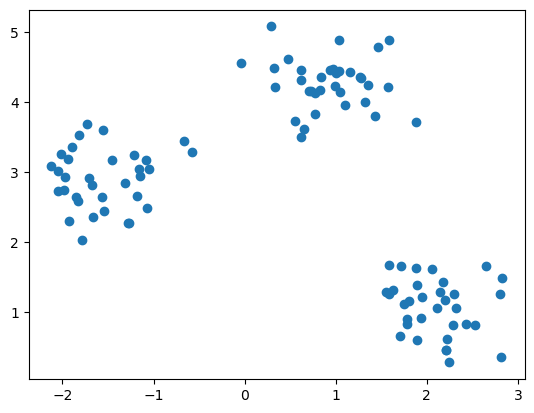

In [1]:
# Generatition de donnees
# Génération de données
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)

c:\Users\bilal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\bilal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

array([2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1])

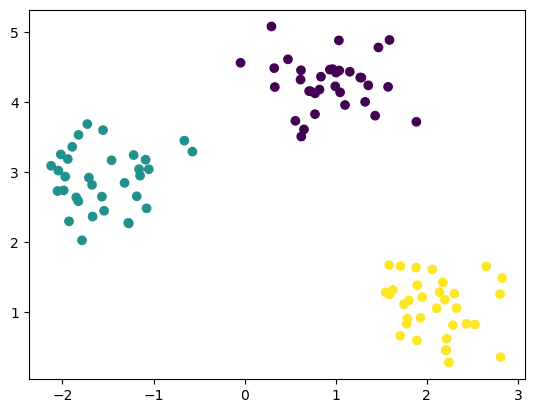

In [3]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))

30.87053128014068
[2 0 2 0 0 0 1 1 2 0 0 0 2 0 1 2 1 0 1 1 1 1 1 0 2 2 2 2 1 1 0 2 2 0 1 1 0
 2 2 1 1 2 2 0 0 0 2 2 1 1 1 2 0 2 1 1 2 2 0 2 2 1 1 1 1 2 0 1 2 0 1 0 0 2
 2 0 0 0 1 2 0 0 2 0 2 0 0 0 2 0 2 2 1 1 1 1 0 0 1 1]
-30.87053128014067


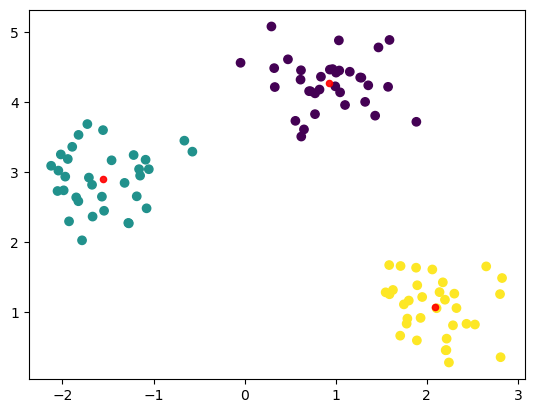

In [4]:
centers = model.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(centers[:,0], centers[:,1], c='red', s=20, alpha=0.9)
# print(centers)
# print(centers[:,0])
# print(centers[:,1])
print(model.inertia_)
print(model.labels_)
print(model.score(X))  # Inertie

c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

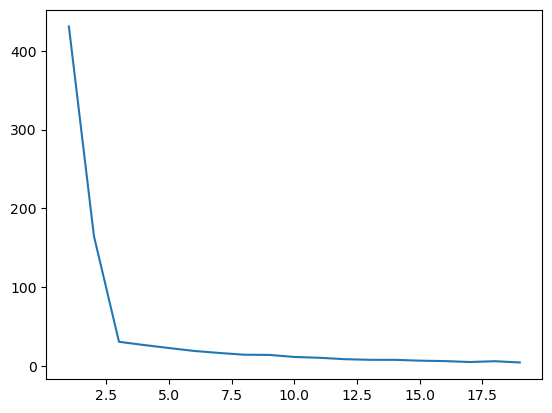

In [5]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    model.predict(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)  # Elbow method  

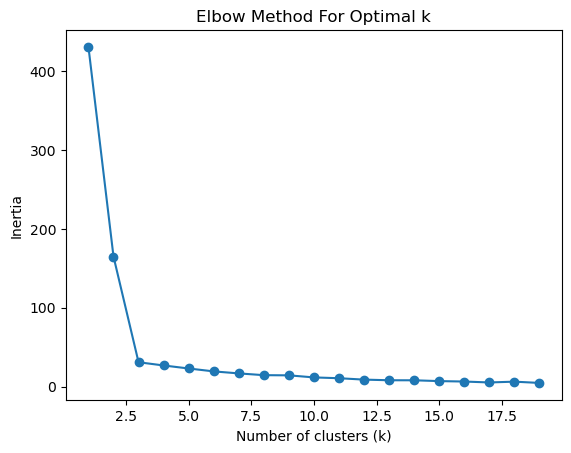

In [6]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

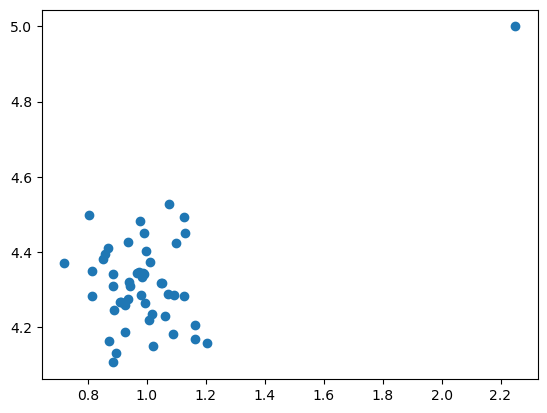

In [7]:
import numpy as np

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])
     

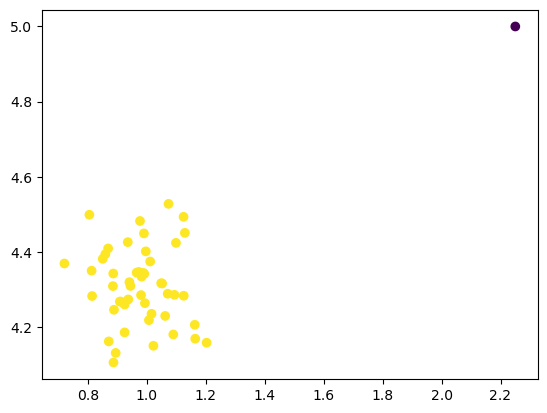

In [8]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
     

# Application Decontamination Digist

In [9]:
from sklearn.datasets import load_digits

In [10]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target  

print(X.shape)

(1797, 64)


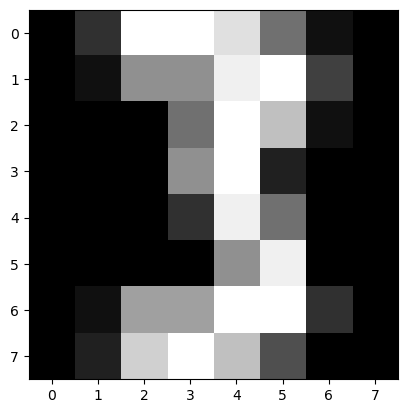

In [11]:
plt.imshow(images[63], cmap='gray')

In [12]:
model = IsolationForest(contamination=0.02, random_state=0)

In [13]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [14]:
# prediction 
outliers = model.predict(X) == -1 # 1 = normal, -1 = abnormal

In [15]:
print(outliers)

[False False False ... False False False]


Text(0.5, 1.0, '2')

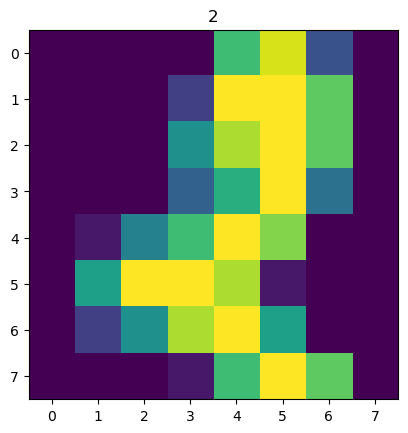

In [16]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

# PCA

In [17]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)
X_pca = model.transform(X)  # Transformation        
print(X_pca.shape)  

(1797, 2)


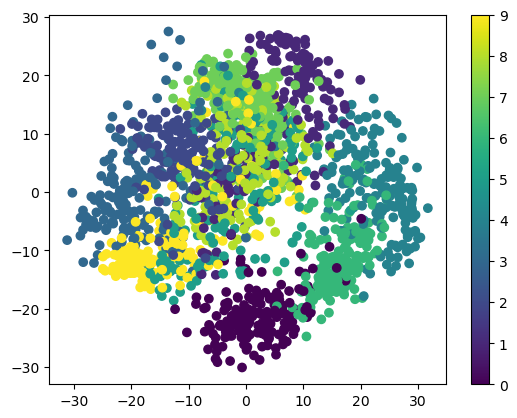

In [18]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.colorbar()

In [19]:
model.components_.shape

(2, 64)

In [26]:
model = PCA(n_components=40)
X_reduce = model.fit_transform(X)

In [27]:
np.cumsum(model.explained_variance_ratio_)  # Explained variance

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273])

28

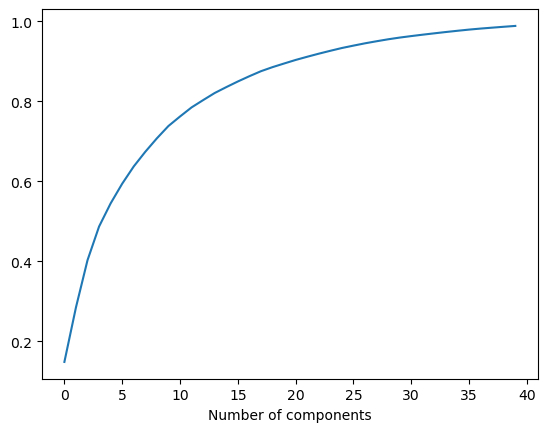

In [30]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of components')
np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95)

In [32]:
X_recovred = model.inverse_transform(X_reduce)

Text(0.5, 1.0, '0')

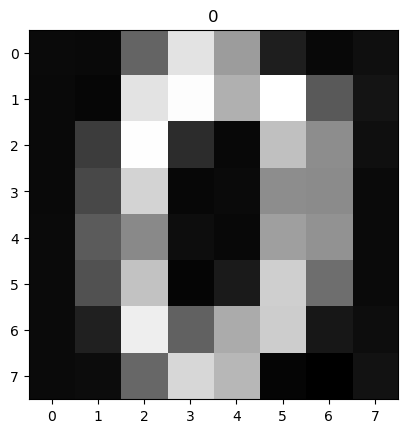

In [35]:
plt.imshow(X_recovred[0].reshape(8, 8), cmap='gray')
plt.title(y[0])

In [36]:
model = PCA(n_components=0.95)
X_reduce = model.fit_transform(X)
X_recovred = model.inverse_transform(X_reduce)

Text(0.5, 1.0, '0')

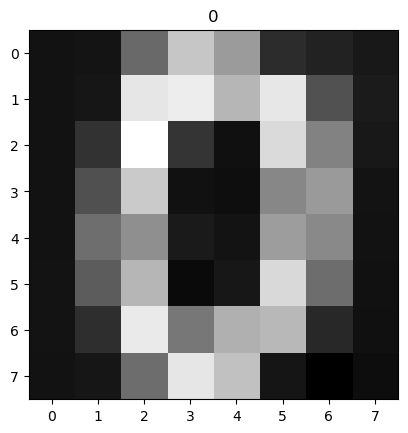

In [38]:
plt.imshow(X_recovred[0].reshape(8, 8), cmap='gray')
plt.title(y[0])

In [39]:
model.n_components_

29